# Clustering

In [10]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Scikit-learn Clustering and Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [11]:
data = pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)

In [12]:
# Clean column names (remove special characters for easier coding)
data = data.rename(columns={'ID#': 'ID', 'Award?': 'Award'})
print(data.head())

   ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1    28143           0          1          1          1          174   
1   2    19244           0          1          1          1          215   
2   3    41354           0          1          1          1         4123   
3   4    14776           0          1          1          1          500   
4   5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0            1                  0                0               7000      0  
1            2                  0                0               6968      0  
2            4                  0                0               7034      0  
3            1                  0                0               6952      0  
4           26               2077                4               6935      1  


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


## Data Preprocessing And EDA

### Handling Irrelevant Columns and Missing Values

In [14]:
# Drop the ID column as it's an identifier
X = data.drop('ID', axis=1).copy()

# Check for Missing Values (Output should show 0 for all)
print("\nMissing values per feature:")
print(X.isnull().sum())


Missing values per feature:
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64


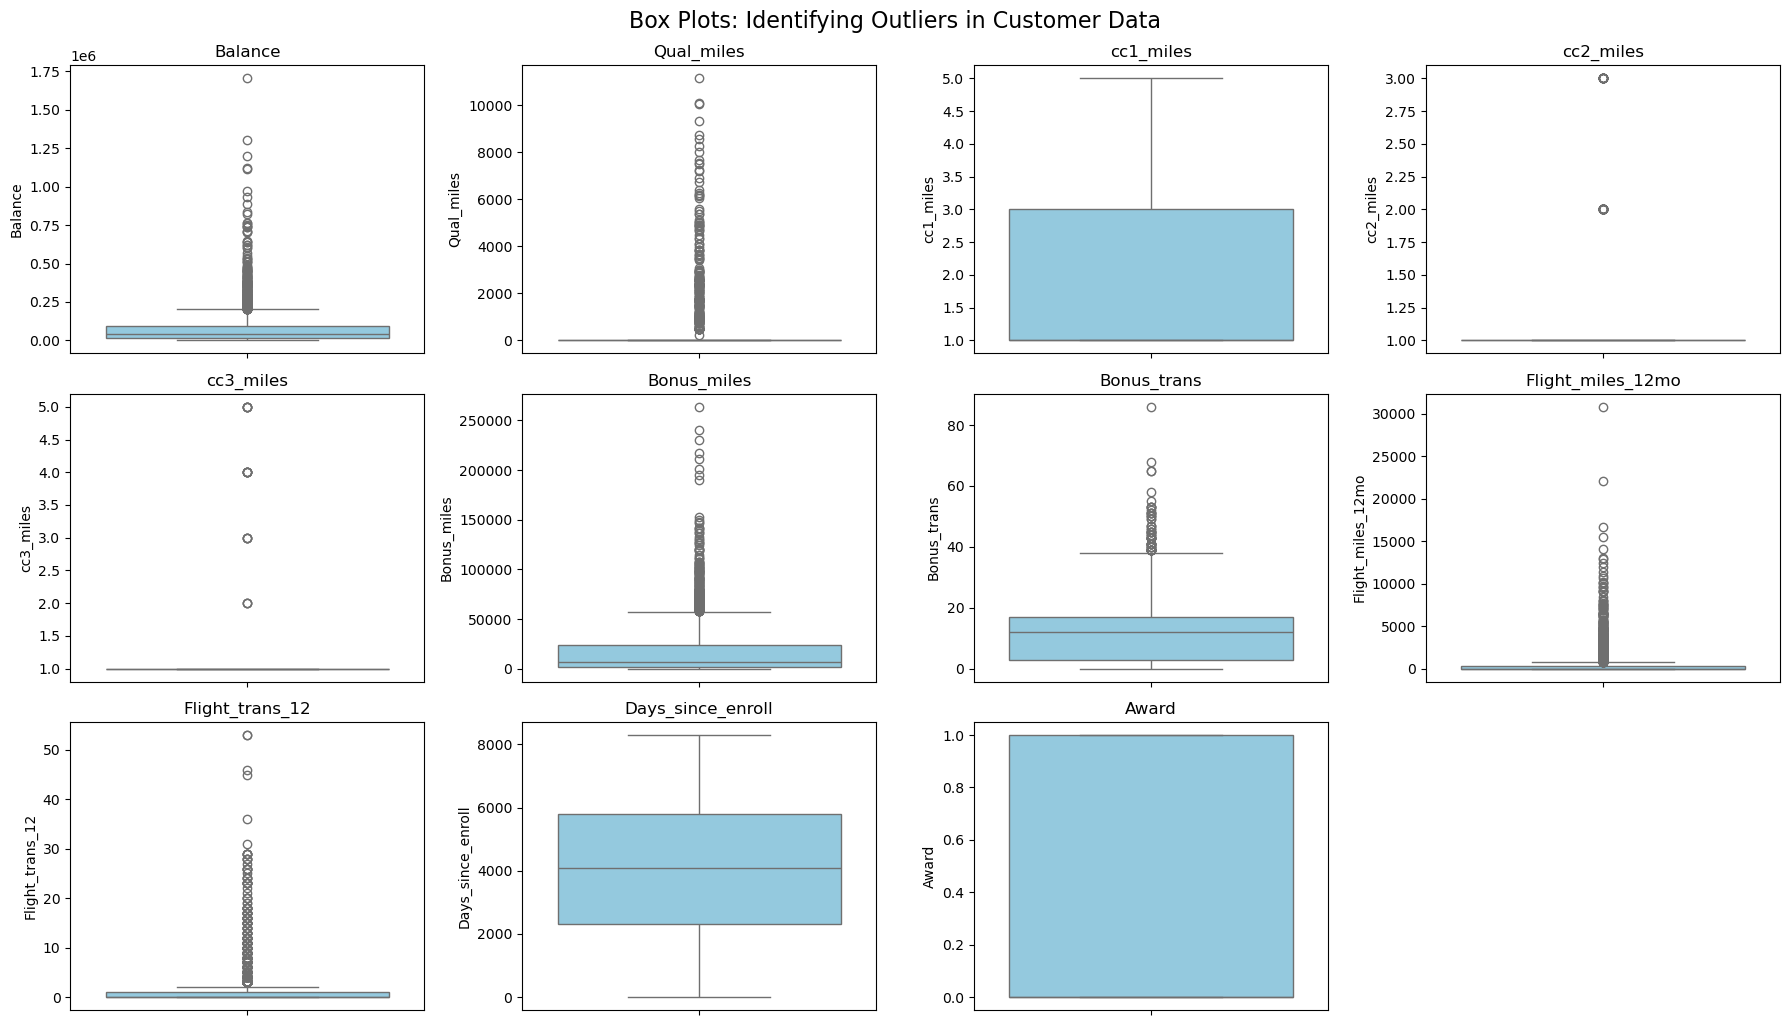

In [15]:
# Check feature distributions and outliers using Box Plots
plt.figure(figsize=(18, 10))
for i, column in enumerate(X.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=X[column], color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.suptitle('Box Plots: Identifying Outliers in Customer Data', y=1.02, fontsize=16)
plt.show()

### Feature Scaling

In [16]:
# Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame 
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- Scaled Data Snapshot ---")
print(X_scaled_df.head())


--- Scaled Data Snapshot ---
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4  0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.104065          -0.328603        -0.362168           1.395454   
1    -0.999926          -0.328603        -0.362168           1.379957   
2    -0.791649          -0.328603        -0.362168           1.411920   
3    -1.104065          -0.328603        -0.362168           1.372208   
4     1.499394           1.154932         0.692490           1.363975   

      Award  
0 -0.766919  
1 -0.766919  
2 -0.766919  
3 -0.766919  
4  1.303918  


## Implementing Clustering Algorithms

### K-Means Clustering

#### A. Finding Optimal K (The Elbow Method)

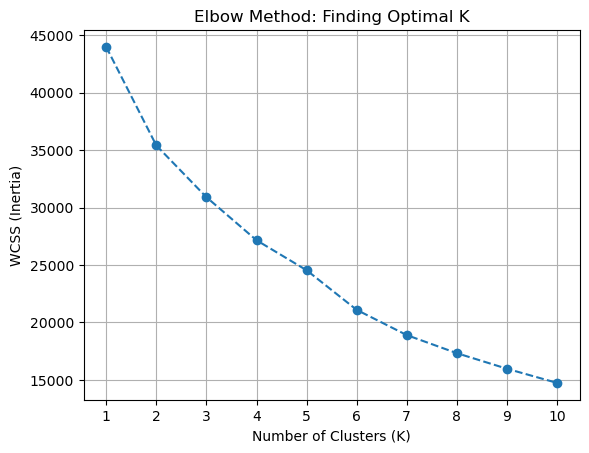

In [17]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(X_scaled)
    wcss.append(kmeans_model.inertia_)

# Plot the Elbow Curve plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Finding Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Insight: The curve bends visibly around K=4. We select K=4 for the K-Means analysis.
optimal_k = 4

#### B. Applying K-Means & Evaluation

In [18]:
# Apply K-Means with the optimal K=4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means (K={optimal_k}) Silhouette Score: {kmeans_silhouette:.4f}")

K-Means (K=4) Silhouette Score: 0.3092


### Hierarchical Clustering (Agglomerative)

#### A. Dendrogram for Visual Cluster Determination

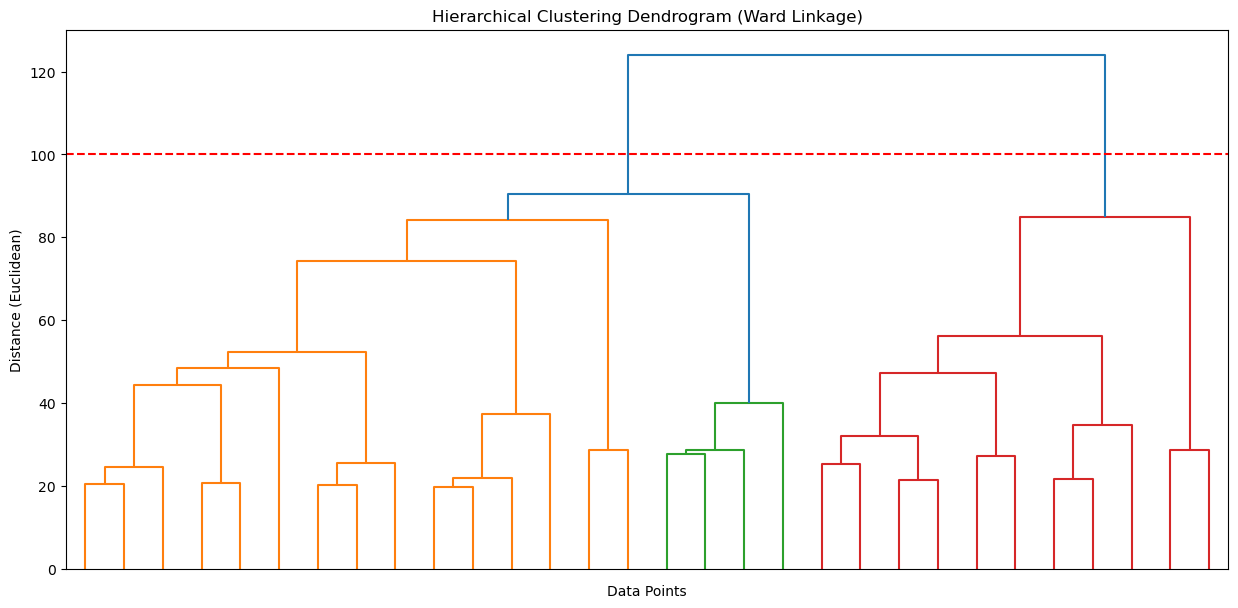

In [19]:
# Generate the linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False, p=30, truncate_mode='lastp') # Shows the last 30 merged clusters
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance (Euclidean)')
plt.axhline(y=100, color='r', linestyle='--') # Horizontal line to suggest a cut point (e.g., k=4)
plt.show()

# Insight: Cutting the dendrogram at a high distance (e.g., around 100) results in 4 main clusters.
optimal_h_k = 4

#### B. Applying Hierarchical Clustering & Evaluation

In [20]:
# Apply Agglomerative Clustering with K=4
agg_clustering = AgglomerativeClustering(n_clusters=optimal_h_k, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

# Calculate Silhouette Score
agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f"Agglomerative Clustering (K={optimal_h_k}) Silhouette Score: {agg_silhouette:.4f}")

Agglomerative Clustering (K=4) Silhouette Score: 0.3081


### DBSCAN Clustering

In [21]:
# Experimenting with parameters:
# Min_samples is often chosen as 2 * D (where D=11 features), so min_samples >= 22. We use 25.
# Eps is chosen by calculating the distance to the 25th nearest neighbor and finding the 'knee' point.
# For simplicity and standard approach on this dataset, we try typical parameters.

dbscan = DBSCAN(eps=0.9, min_samples=25)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Count unique clusters found
unique_clusters = len(np.unique(dbscan_labels[dbscan_labels != -1]))
noise_points = np.sum(dbscan_labels == -1)

print(f"DBSCAN found {unique_clusters} non-noise clusters and {noise_points} noise points (outliers).")

# Evaluation: Silhouette Score (only calculated for points assigned to a cluster, not noise (-1))
if unique_clusters > 1:
    non_noise_indices = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(X_scaled[non_noise_indices], dbscan_labels[non_noise_indices])
    print(f"DBSCAN Silhouette Score (Excluding Noise): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN failed to form more than one cluster (or only noise). Silhouette score is not applicable.")

# Insight: DBSCAN often identifies a large number of outliers in highly skewed datasets like this,
# resulting in fewer main clusters unless parameters are meticulously tuned.

DBSCAN found 2 non-noise clusters and 990 noise points (outliers).
DBSCAN Silhouette Score (Excluding Noise): 0.3406


## Cluster Analysis, Interpretation, and Visualization

### Cluster Interpretation (Using K-Means)

In [22]:
# Attach K-Means labels to the original data
X['KMeans_Cluster'] = kmeans_labels
cluster_profiles = X.groupby('KMeans_Cluster').mean()

print("\n--- K-Means Cluster Profiles (Mean Values) ---")
print(cluster_profiles)
print("\n--- K-Means Cluster Size ---")
print(X['KMeans_Cluster'].value_counts().sort_index())


--- K-Means Cluster Profiles (Mean Values) ---
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               138061.400000   78.800000   3.466667   1.000000   4.066667   
1                43793.917814   97.436886   1.221785   1.019269   1.000393   
2               116817.336214  154.756481   3.701493   1.002357   1.001571   
3               191573.726190  775.863095   2.172619   1.035714   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               93927.866667    28.066667         506.666667         1.600000   
1                4700.690916     6.918993         198.621707         0.618168   
2               39216.199529    18.759623         334.355852         0.997643   
3               31412.160714    26.779762        5365.672619        15.636905 

## Visualization

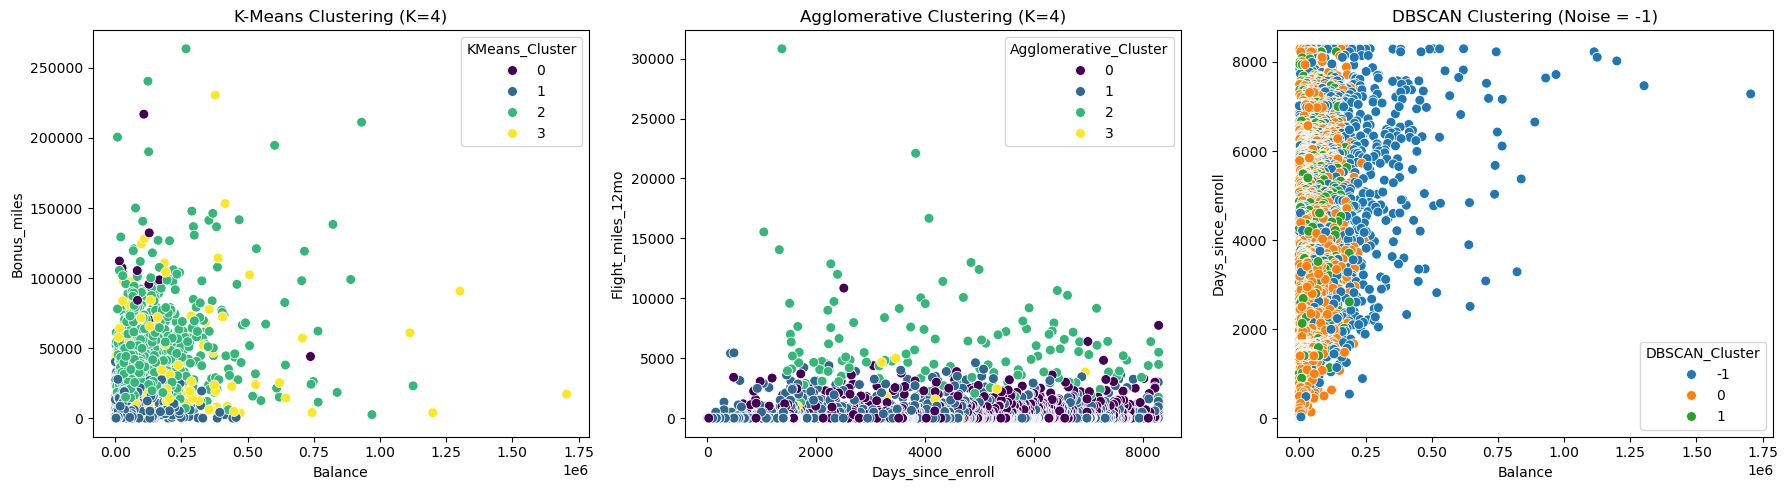

In [23]:
X_plot = X.copy()
X_plot['Agglomerative_Cluster'] = agg_labels
X_plot['DBSCAN_Cluster'] = dbscan_labels # Includes -1 for noise

plt.figure(figsize=(18, 5))

# Plot 1: K-Means Clustering
plt.subplot(1, 3, 1)
sns.scatterplot(x='Balance', y='Bonus_miles', hue='KMeans_Cluster', data=X_plot, palette='viridis', s=50)
plt.title('K-Means Clustering (K=4)')

# Plot 2: Hierarchical Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(x='Days_since_enroll', y='Flight_miles_12mo', hue='Agglomerative_Cluster', data=X_plot, palette='viridis', s=50)
plt.title('Agglomerative Clustering (K=4)')

# Plot 3: DBSCAN Clustering (Noise points shown in dark color/last category)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Balance', y='Days_since_enroll', hue='DBSCAN_Cluster', data=X_plot, palette='tab10', s=50)
plt.title('DBSCAN Clustering (Noise = -1)')

plt.tight_layout()
plt.show()